In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



### Generate an Image of Digit '9'


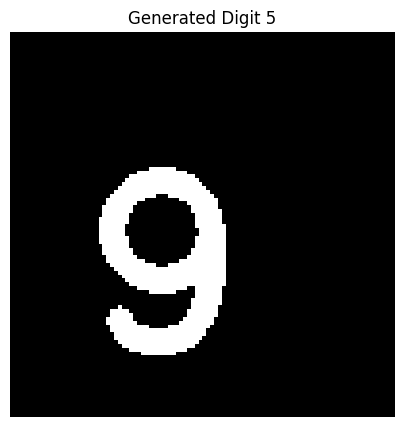

In [31]:
# Generate an image of digit '9'
digit = np.zeros((100, 100), dtype=np.uint8)
cv2.putText(digit, '9', (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 5)

# Visualize the generated image
plt.figure(figsize=(5, 5))
plt.imshow(digit, cmap='gray')
plt.title('Generated Digit 5')
plt.axis('off')
plt.show()



### Convert Image to Binary


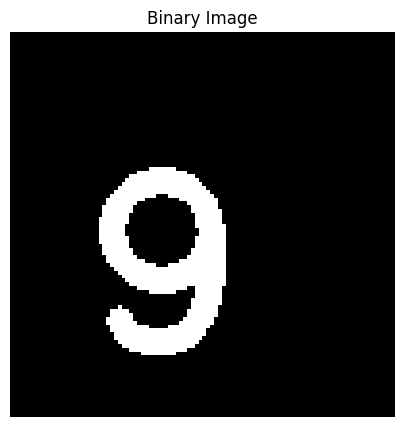

In [32]:
# Convert image to binary
ret, thresh = cv2.threshold(digit, 127, 255, cv2.THRESH_BINARY)

# Visualize the binary image
plt.figure(figsize=(5, 5))
plt.imshow(thresh, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()



### Find Contours


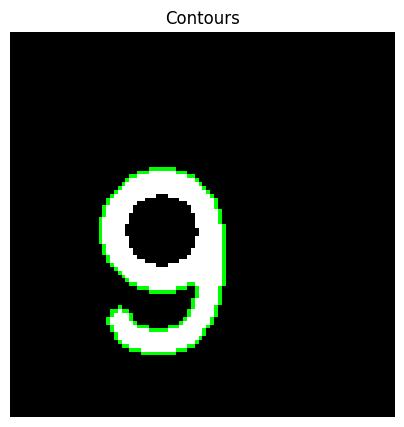

In [33]:
# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Visualize the contours
border_image = cv2.cvtColor(digit, cv2.COLOR_GRAY2BGR)
cv2.drawContours(border_image, contours, -1, (0, 255, 0), 1)

plt.figure(figsize=(5, 5))
plt.imshow(border_image)
plt.title('Contours')
plt.axis('off')
plt.show()



### Calculate Chain Code


In [34]:
directions = {
    (0, 1): 0,  (1, 1): 1,  (1, 0): 2,  (1, -1): 3,
    (0, -1): 4, (-1, -1): 5, (-1, 0): 6, (-1, 1): 7
}

chain_code = []
if contours:
    contour = contours[0]
    for i in range(1, len(contour)):
        x1, y1 = contour[i-1][0]
        x2, y2 = contour[i][0]
        border_image[y1, x1] = (0, 255, 0)
        dx = x2 - x1
        dy = y2 - y1
        if (dx, dy) in directions:
            chain_code.append(directions[(dx, dy)])

    print("Original Chain Code:", chain_code)
else:
    print("No contours found.")

Original Chain Code: [7, 6, 6, 7, 6, 7, 7, 7, 7, 7, 7, 0, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 0, 0, 7, 0, 0, 7, 0, 7, 7, 7, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 5, 4, 5, 6, 5, 7, 6, 0, 7, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6]




### Downsample Chain Code


In [35]:
if chain_code:
    max_order = 10
    step = max(1, len(chain_code) // max_order)
    downsampled_code = chain_code[::step]
    print("Downsampled Chain Code:", downsampled_code)

Downsampled Chain Code: [7, 7, 1, 2, 6, 5, 2, 3, 3, 4, 5]




### Calculate First Difference and Shape Number


In [36]:
if chain_code:
    first_difference = [(downsampled_code[i] - downsampled_code[i-1]) % 8 for i in range(1, len(downsampled_code))]
    print("First Difference:", first_difference)

    rotations = [first_difference[i:] + first_difference[:i] for i in range(len(first_difference))]
    shape_number = min(rotations)
    print("Shape Number:", shape_number)

First Difference: [0, 2, 1, 4, 7, 5, 1, 0, 1, 1]
Shape Number: [0, 1, 1, 0, 2, 1, 4, 7, 5, 1]




### Visualize Results


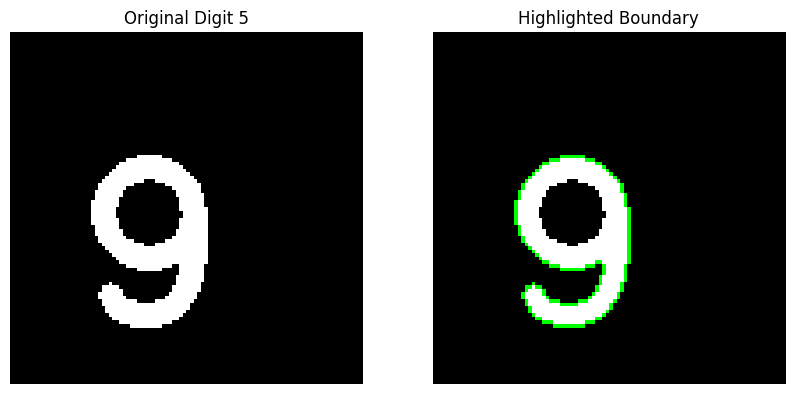

In [37]:
if chain_code:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(digit, cmap='gray')
    plt.title("Original Digit 5")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(border_image)
    plt.title("Highlighted Boundary")
    plt.axis('off')

    plt.show()